In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline

In [3]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Batch Gradient Descent Adaline

In [179]:
df = pd.read_csv('/content/drive/MyDrive/Intro to Machine Learning/Assignments/Assignment 2/banknote.txt', header=None)

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [236]:
class AdalineGD():
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    
    rgen = np.random.RandomState(self.random_state)
    X = np.insert(X, 0, 1, axis=1)
    self.w_ = rgen.normal(loc=0, scale=0.01, size=X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)

      errors = (y-output)

      update = self.eta * X.T.dot(errors)

      self.w_ = self.w_ + update

      cost = 0.5 *(errors**2).sum()

      self.cost_.append(cost)

    return self

  
  def net_input(self, X):
    Z = np.dot(X, self.w_)
    return Z

  def activation(self, Z):
    return Z

  def predict(self, X):
      X = np.insert(X, 0, 1, axis=1)
      Z = self.net_input(X)
      output = self.activation(Z)
      y_hat = np.where(output >= 0, 1, -1)
      return y_hat


In [237]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = np.where(y==0, -1, 1)

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, stratify=y)

In [249]:
ada = AdalineGD(eta=0.00001, n_iter=100)
ada.fit(X, y)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


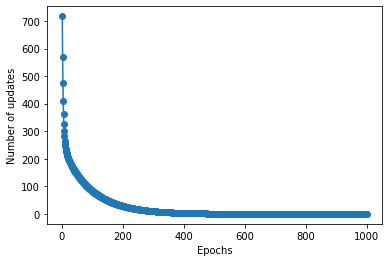

In [241]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Mini-Batch Gradient Descent Adaline

In [262]:
class AdalineMGD():
  def __init__(self, eta=0.01, n_iter=50, random_state=1, batch_size=100):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    self.batch_size = batch_size    
  
  def fit(self, X, y):
    
    rgen = np.random.RandomState(self.random_state)
    X = np.insert(X, 0, 1, axis=1)
    self.w_ = rgen.normal(loc=0, scale=0.01, size=X.shape[1])
    self.cost_ = []

    n_batches = int(X.shape[0] / self.batch_size)

    for i in range(self.n_iter):
      cost_avg = 0
      for i in range(n_batches):                                                   
        try:
          X_batch = X[i*self.batch_size : i*self.batch_size+self.batch_size, :]
          y_batch = y[i*self.batch_size : i*self.batch_size+self.batch_size]
        except:
          X_batch = X[i*self.batch_size : -1, :]
          y_batch = y[i*self.batch_size : -1]

        net_input = self.net_input(X_batch)
        output = self.activation(net_input)

        errors = (y_batch-output)

        update = self.eta * X_batch.T.dot(errors)

        self.w_ = self.w_ + update

        cost = 0.5 *(errors**2).sum()

        cost_avg = cost_avg + cost

      self.cost_.append(cost_avg / n_batches)

    return self

  
  def net_input(self, X):
    Z = np.dot(X, self.w_)
    return Z

  def activation(self, Z):
    return Z

  def predict(self, X):
      X = np.insert(X, 0, 1, axis=1)
      Z = self.net_input(X)
      output = self.activation(Z)
      y_hat = np.where(output >= 0, 1, -1)
      return y_hat


In [277]:
ada = AdalineMGD(eta=0.00001, n_iter=20, batch_size=10)
ada.fit(X, y)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9636363636363636


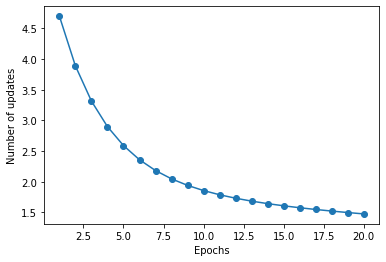

In [278]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Multi-class classification with Logistic Regression

In [282]:
iris_df = pd.read_csv('/content/drive/MyDrive/Intro to Machine Learning/Notebooks/ch02/ch02/iris.data', header=None)
iris_df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [284]:
iris_df.loc[iris_df[4] == 'Iris-setosa', 4] = 0
iris_df.loc[iris_df[4] == 'Iris-versicolor', 4] = 1
iris_df.loc[iris_df[4] == 'Iris-virginica', 4] = 2
iris_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [296]:
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values.astype(int)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, stratify=y)

In [304]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1, multi_class='ovr')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9666666666666667


In [ ]:
# use C parameter after regularization